In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel,roberts, scharr, prewitt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import xarray as xr



In [ ]:
#Resize images to
SIZE = 128

#Capturing images and labels into arrays.
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        img = cv2.resize(img, (SIZE, SIZE)) #Resizing images
        train_images.append(img)
        train_labels.append(label)

    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images.append(img)
        train_labels.append(label)

    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

minor
moderate
severe


In [ ]:
#Resize images to
SIZE = 128

#Capturing images and labels into arrays.
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resizing images
        train_images.append(img)
        train_labels.append(label)

        
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images.append(img)
        train_labels.append(label)

    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

minor
moderate
severe


In [ ]:
#Resize images to
SIZE = 128

#Capturing images and labels into arrays.
train_images_1 = []
train_labels_1 = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resizing images
        hist,bins = np.histogram(img.ravel(),256)
        train_images_1.append(hist)
        train_labels_1.append(label)

        
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images_1.append(img)
        train_labels_1.append(label)

    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
        train_images_1.append(img)
        train_labels_1.append(label)
        
train_images_1 = np.array(train_images_1)
train_labels_1 = np.array(train_labels_1)

minor
moderate
severe


<ipython-input-5-371655f6e1d1>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_images_1 = np.array(train_images_1)


In [ ]:
img.shape

(128, 128)

In [ ]:
#Test images
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/validation/*"):
    test_label = directory_path.split("-")[-1]
    print(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        hist,bins = np.histogram(img.ravel(),256,[0,256])

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

minor
severe
moderate


In [ ]:
test_images.shape

(248, 128, 128)

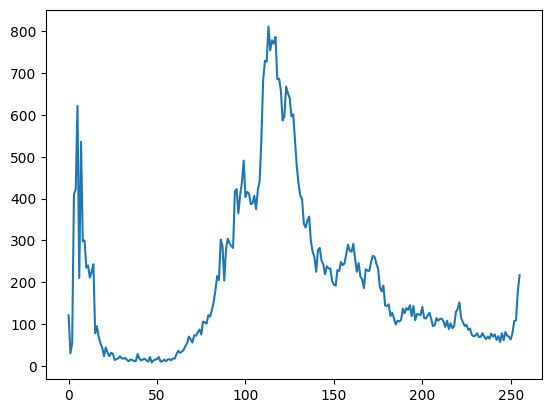

In [ ]:
img = cv2.imread('/content/drive/MyDrive/data3a/training/01-minor/0001.JPEG',cv2.IMREAD_GRAYSCALE)
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)
plt.show()


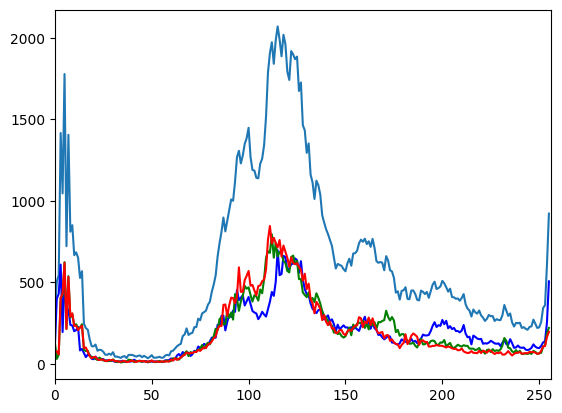

(0.0, 256.0)

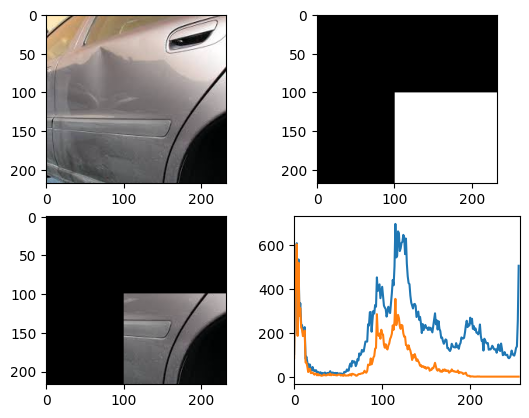

In [ ]:
img = cv2.imread('/content/drive/MyDrive/data3a/training/01-minor/0001.JPEG')
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])


In [ ]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
# Normalizing pixel values to between 0 and 1
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
#Spliting data into train, validation and test datasets 
x_train, x_val,y_train, y_val = train_test_split(train_images, train_labels_encoded, test_size=0.30, random_state=1)
x_test, y_test = test_images, test_labels_encoded


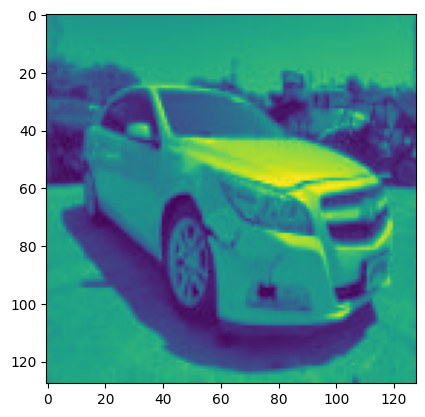

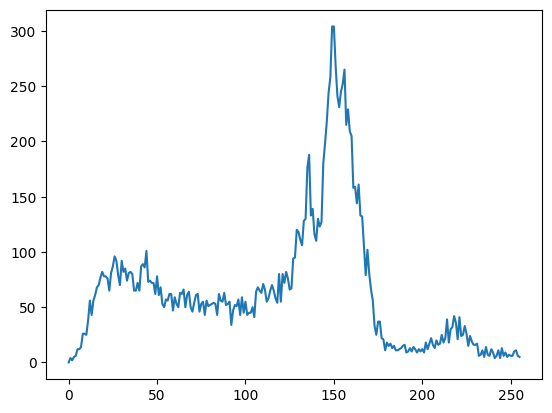

In [ ]:
im = plt.imshow(x_train[1])
plt.show()
hist,bins = np.histogram(x_train[1].ravel(),256,[0,256])
plt.plot(hist)



In [ ]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((968, 128, 128), (968,), (415, 128, 128), (415,), (248, 128, 128), (248,))

In [ ]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        

        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        
        input_img = x_train[image, :,:]
        img = input_img

         # FEATURE 1 - Pixel values         
        #Adding pixel values to the data frame 

        hist,bins = np.histogram(img.ravel(),256,[0,256])
        df['Pixel_Value'] = hist 

        
        #Append features from current image to the dataset
        image_dataset= pd.concat([image_dataset, df], axis=0)
        
    return image_dataset

In [ ]:
#Extract features from training images
image_features = feature_extractor(x_train)
X_for_ML_GLCM =image_features
X_for_ML_GLCM.shape

(247808, 1)

In [ ]:
train_features = feature_extractor(x_train)
train_features = np.expand_dims(train_features, axis=0)
train_for_RF = np.reshape(train_features, (x_train.shape[0], -1))
train_for_RF.shape

(968, 256)

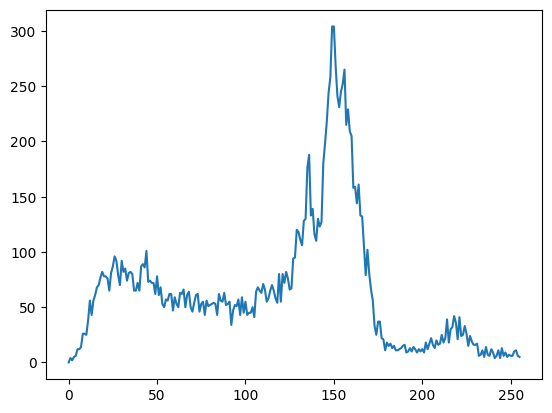

In [ ]:
hist,bins = np.histogram(x_train[1].ravel(),256,[0,256])
plt.plot(hist)

In [ ]:
(hist-train_for_RF[1]).sum()

0

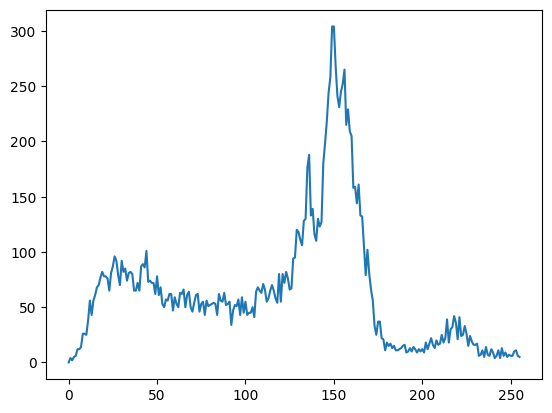

In [ ]:
plt.plot(train_for_RF[1])

In [ ]:
val_features = feature_extractor(x_val)
val_features = np.expand_dims(val_features, axis=0)
val_for_RF = np.reshape(val_features, (x_val.shape[0], -1))
val_for_RF.shape

(415, 256)

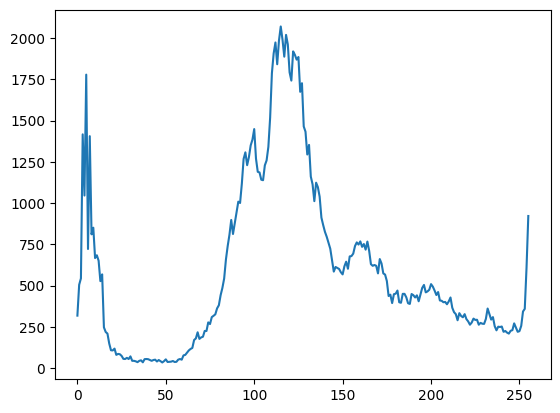

In [ ]:
img = cv2.imread('/content/drive/MyDrive/data3a/training/01-minor/0001.JPEG')
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

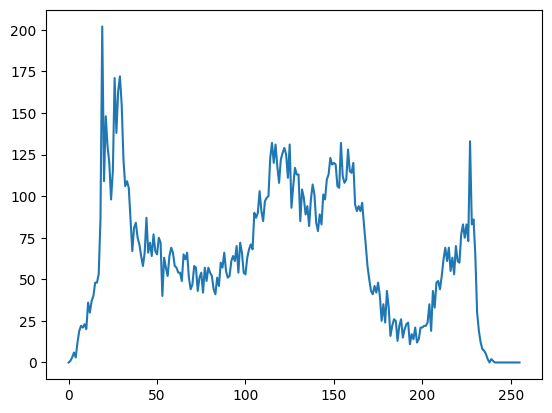

In [ ]:
hist,bins = np.histogram(train_images[0].ravel(),256,[0,256])
plt.plot(hist)

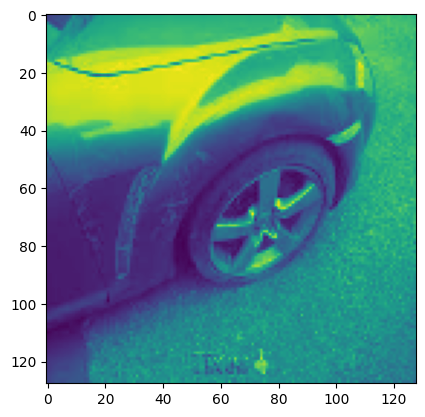

In [ ]:
im = plt.imshow(train_images[0])
plt.show()


In [ ]:
x_train[2],x_train[2].shape

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [253, 254, 251, ..., 255, 255, 255],
        [253, 254, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 (128, 128))

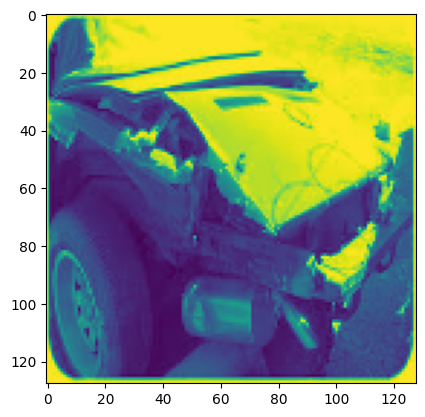

2

In [ ]:
im = plt.imshow(x_train[2])
plt.show()
y_train[2]